# The goal of this notebook is to find the polarity of the checkerboard stimulus displayed on the retina on the MEA 2 rig

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import matplotlib.gridspec as gds
import pickle
from checkerboard import Checkerboard

### Checkerboard on the set-up

Pictures from the set-up.

First frame

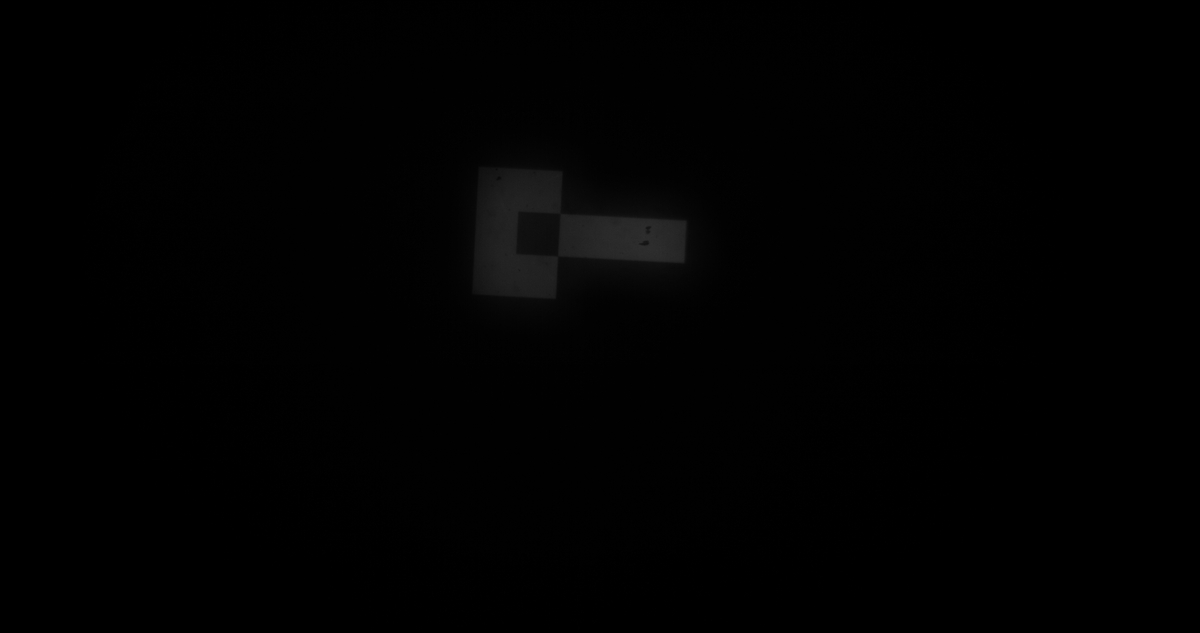

Second frame

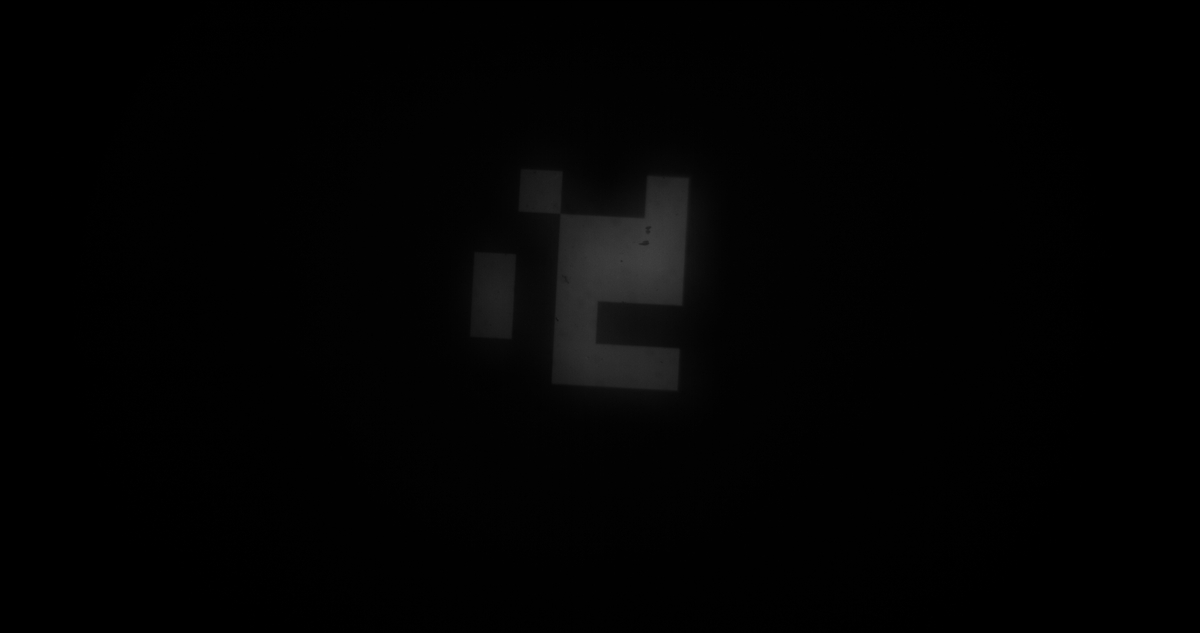

Digitalisation of the two first frames seen on the camera (5x5 checks).

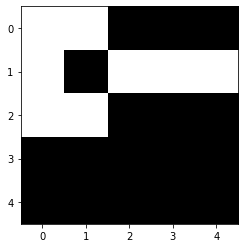

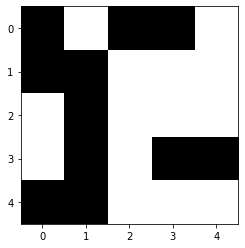

In [11]:
first_frame_camera = np.array([[1,1,0,0,0],
                             [1,0,1,1,1],
                             [1,1,0,0,0],
                             [0,0,0,0,0],
                             [0,0,0,0,0]])

second_frame_camera = np.array([[0,1,0,0,1],
                             [0,0,1,1,1],
                             [1,0,1,1,1],
                             [1,0,1,0,0],
                             [0,0,1,1,1]])

plt.figure()
plt.imshow(first_frame_camera, cmap='gray')

plt.figure()
plt.imshow(second_frame_camera, cmap='gray')

### Checkerboard reconstructed from the binary source file

The checkerboard stimulus is constructed from the file binarysource1000Mbits, that contains a series of 0 and 1. 0 is supposed to correspond to black, and 1 to white, in the stimulus that is projected on the retina. The checkerboard stimulus can be reconstructed using the Checkerboard class.

In [12]:
nb_frames = 2
nb_checks_by_side = 5
rig_nb = 2

binary_source_path = r'C:\Users\goethas\Downloads'
binary_source_filepath = os.path.join(binary_source_path,"binarysource1000Mbits")

checkerboard_object = Checkerboard(nb_checks_by_side, binary_source_filepath, rig_nb) 
checkerboard = checkerboard_object.build_checkerboard(2)

In [14]:
first_frame_reconstructed = checkerboard[0,:,:]
second_frame_reconstructed = checkerboard[1,:,:]

Visual check

Text(0.5, 1.0, '2nd frame reconstructed')

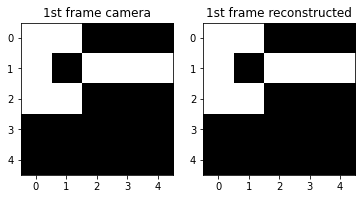

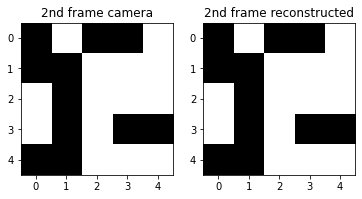

In [15]:
plt.figure()
plt.subplot(121)
plt.imshow(first_frame_camera, cmap='gray')
plt.title('1st frame camera')
plt.subplot(122)
plt.imshow(first_frame_reconstructed, cmap='gray')
plt.title('1st frame reconstructed')

plt.figure()
plt.subplot(121)
plt.imshow(second_frame_camera, cmap='gray')
plt.title('2nd frame camera')
plt.subplot(122)
plt.imshow(second_frame_reconstructed, cmap='gray')
plt.title('2nd frame reconstructed')



Check that arrays are the same.

In [18]:
if first_frame_camera.all() == first_frame_reconstructed.all():
    print ('Reconstructed first frame is the same as on camera' )

if second_frame_camera.all() == second_frame_reconstructed.all():
    print ('Reconstructed second frame is the same as on camera' )

Reconstructed first frame is the same as on camera
Reconstructed second frame is the same as on camera
